In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

df_spotify = pd.read_csv('data.csv')
df_spotify['genre'].value_counts()

genre
0    1041
1     904
Name: count, dtype: int64

# Visualizacion

Antes de entrar de lleno con los modelos de machine learning quiero visualizar que esta pasando con los datos, que correlaciones hay entre ellos y mas importante con el genero. 

Lo primero que pense es hacer unos heatmaps para ver estas correlaciones, primero con un heatmap general y luego dos heatmaps, uno por cada genero.

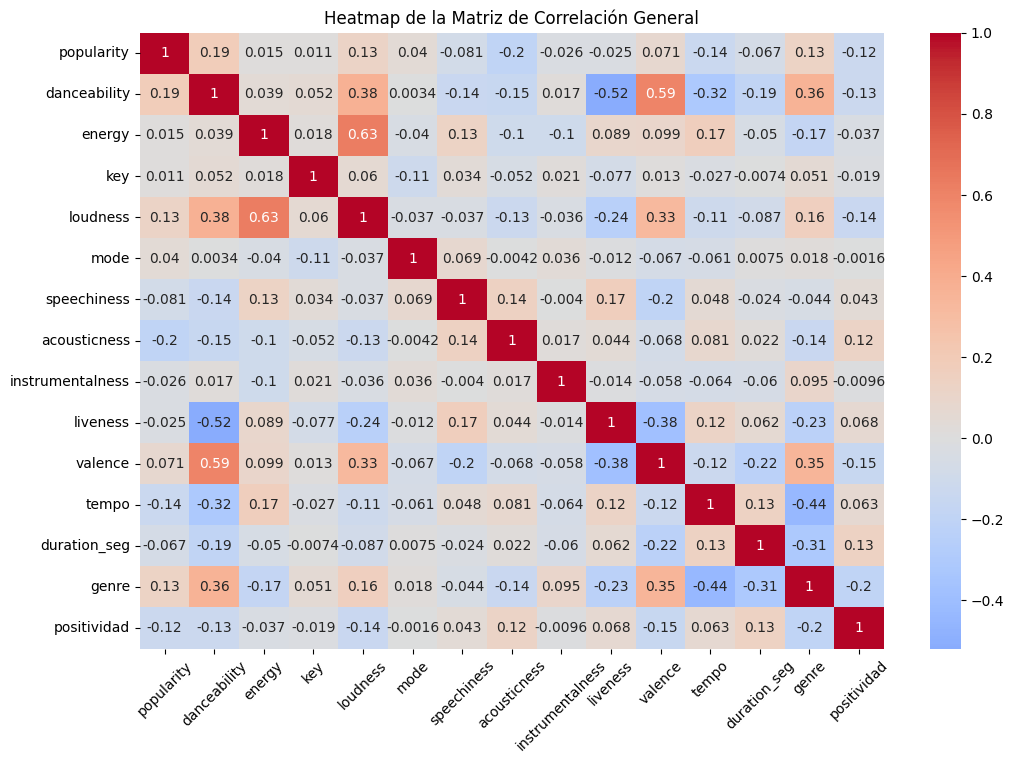

In [2]:
rows_to_delete = ['track_id', 'track_name', 'artist_name']
df_heatmap = df_spotify.drop(rows_to_delete, axis=1)
correlation = df_heatmap.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.title('Heatmap de la Matriz de Correlación General')
plt.show()

En este primer heatmap general se puede ver que las correlaciones mas fuertes estan en el valance, danceability y de manera negativa el tempo.

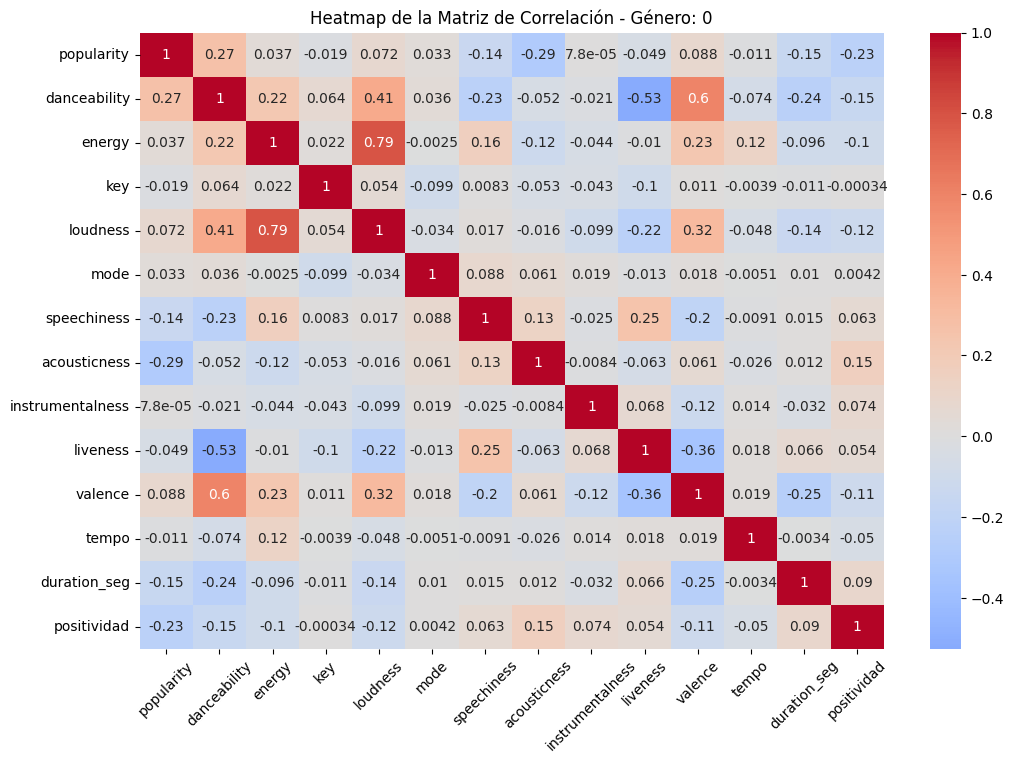

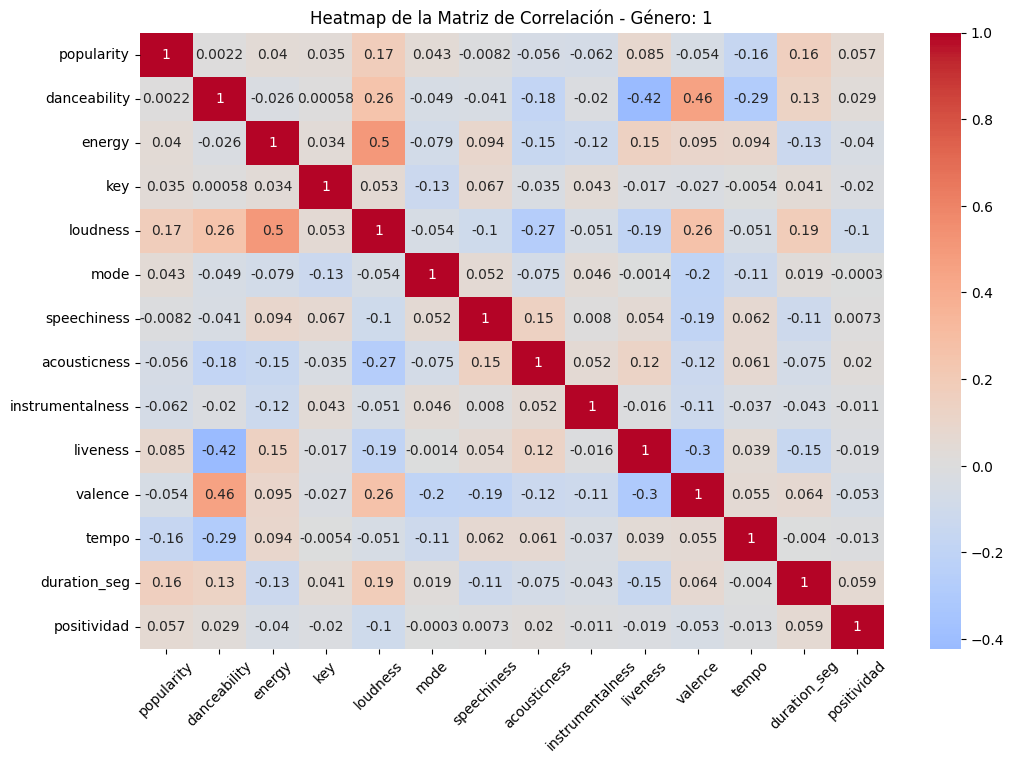

In [3]:
genres = df_spotify['genre'].unique()

for genre in genres:
    df_genre = df_spotify[df_spotify['genre'] == genre]
    df_genre_heatmap = df_genre.drop(['track_id', 'track_name', 'artist_name', 'genre'], axis=1)
    correlation = df_genre_heatmap.corr()
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
    plt.xticks(rotation=45)
    plt.yticks(fontsize=10)
    plt.title(f'Heatmap de la Matriz de Correlación - Género: {genre}')
    plt.show()

Lo interesante a resaltar en estos heatmaps es la diferencia que hay entre cada genero, por ejemplo la correlacion entre liveness y speechiness es muy marcada o energy y valance. Estas diferencias me indican que es posible realizar una distincion entre genero.

Otro grafico interesante puede ser un pairplot como el siguiente.

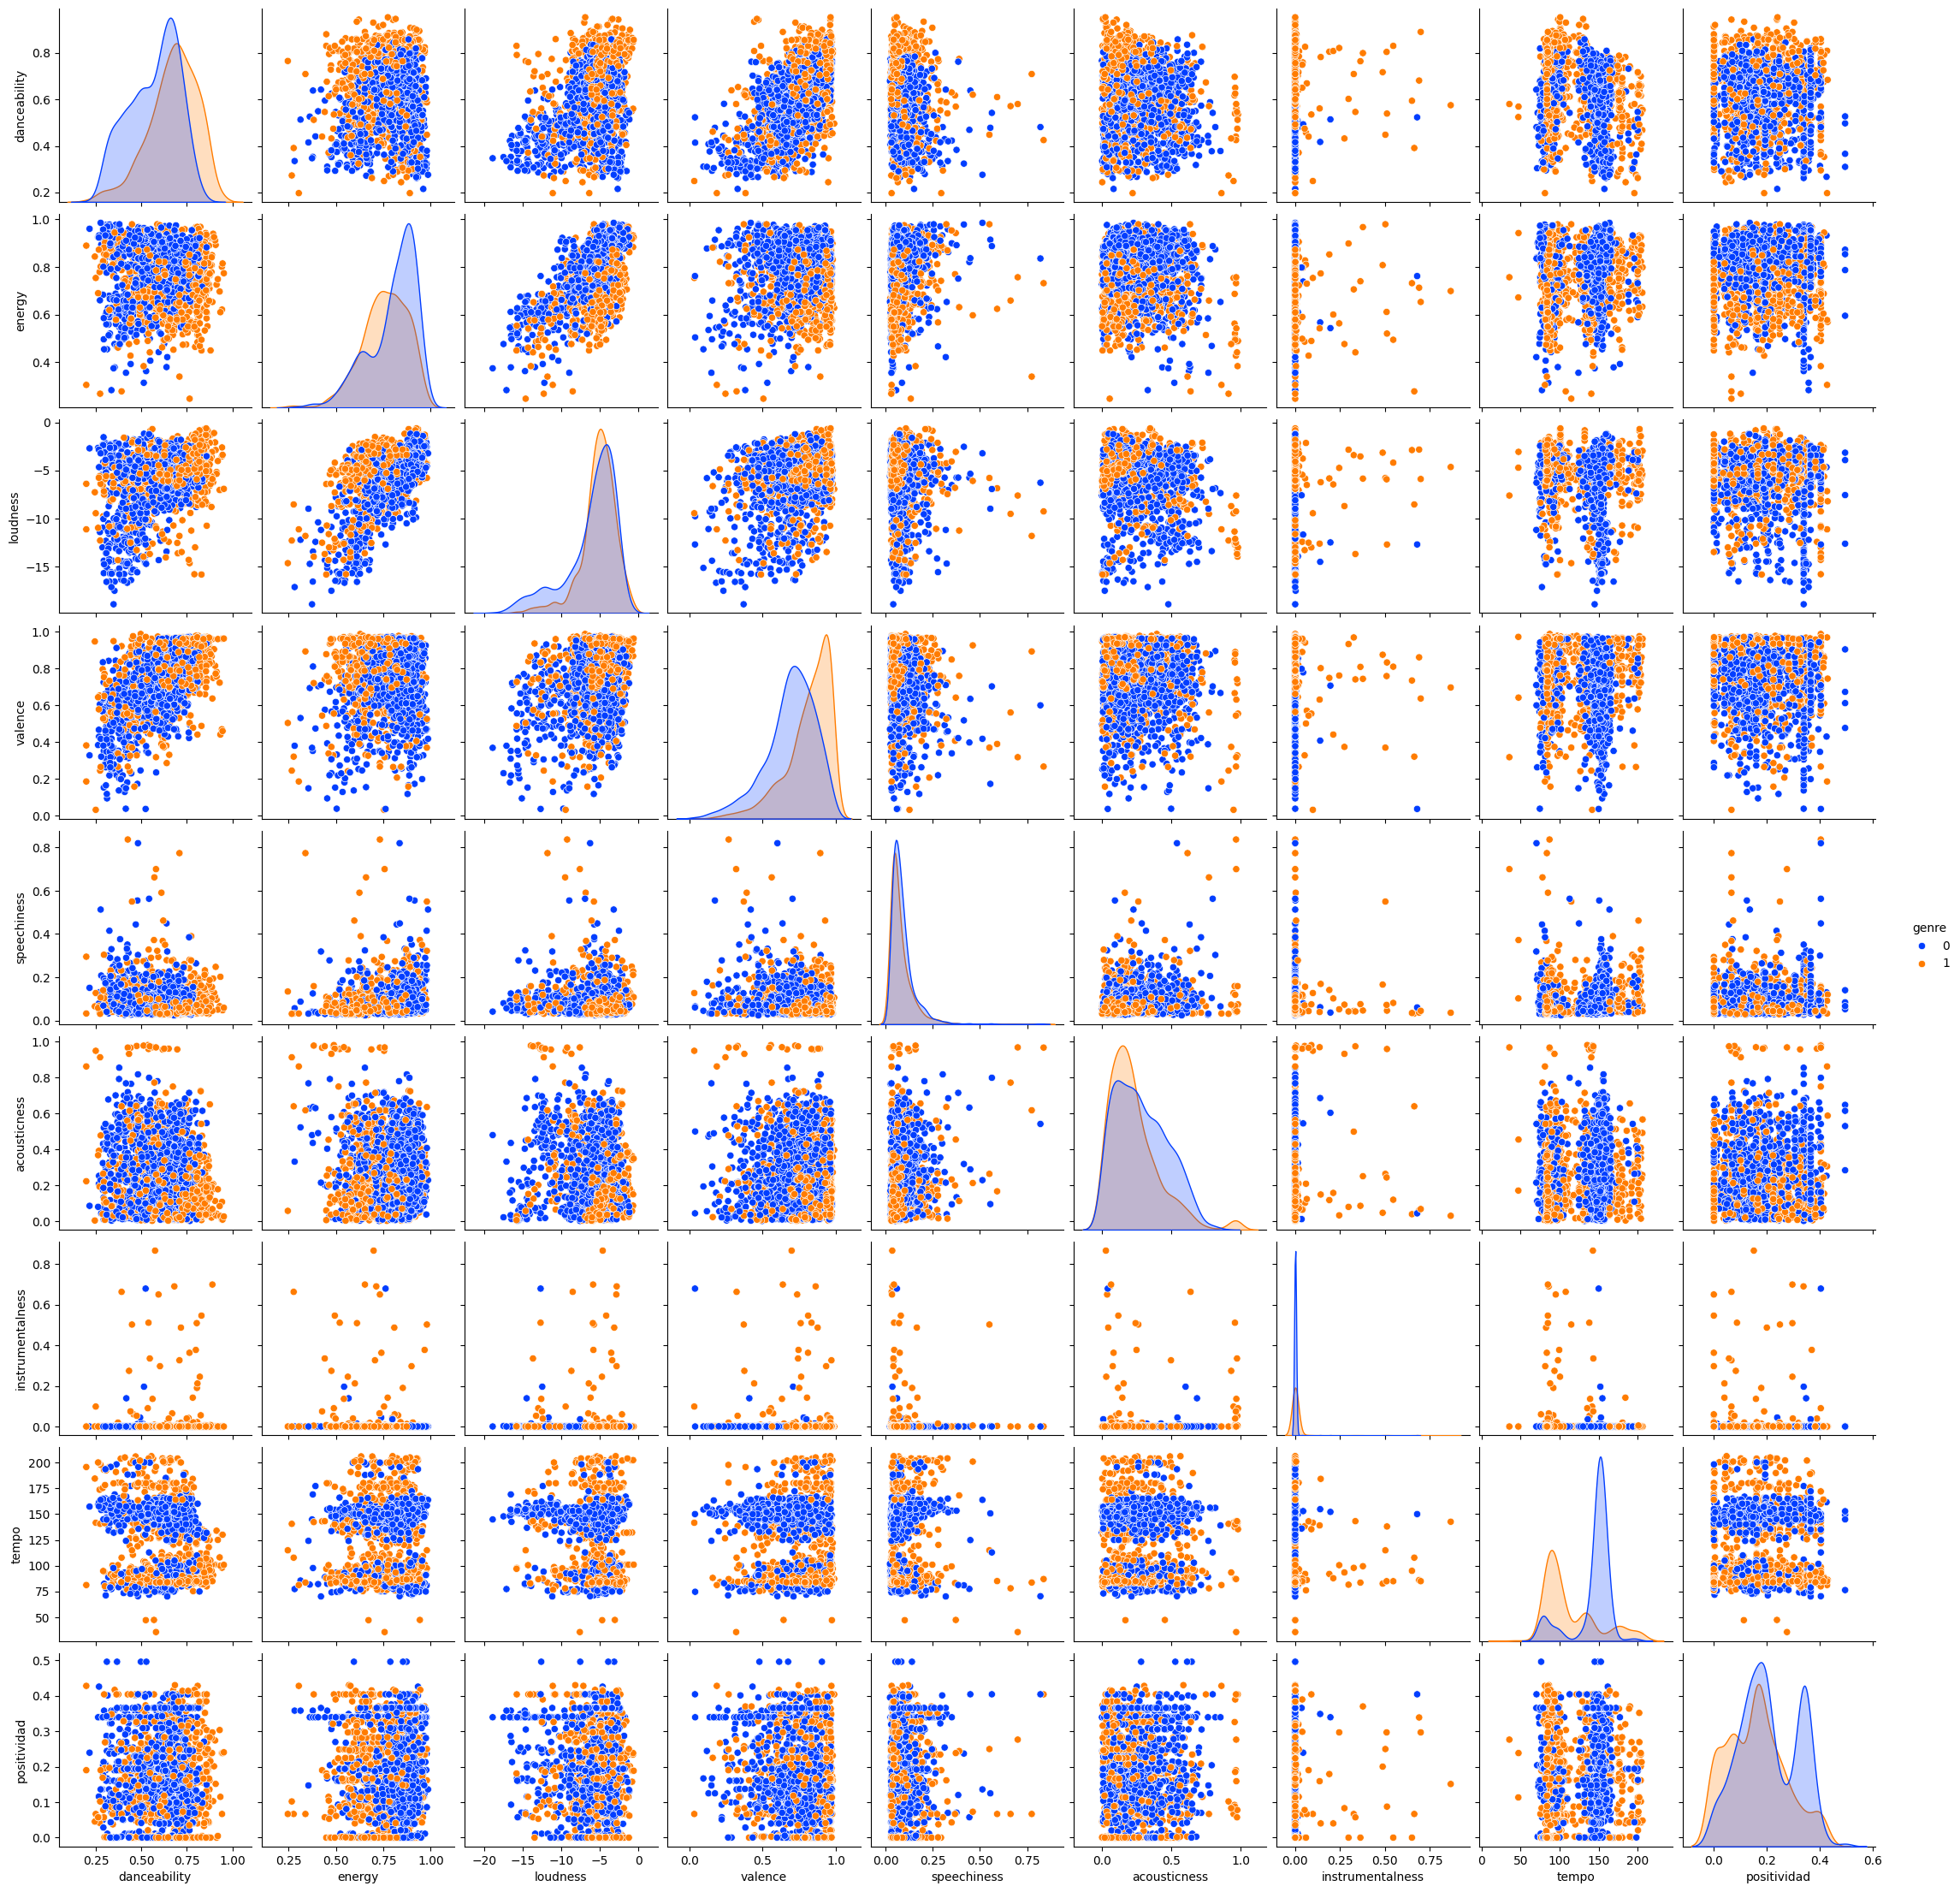

In [4]:
sns.pairplot(df_spotify[['danceability', 'energy', 'loudness', 'valence','speechiness',	'acousticness',	'instrumentalness', 'tempo','positividad', 'genre']], hue='genre', palette='bright')
plt.show()


Viendo la diagonal principal, osea las distribuciones univariadas, donde estan los histogramas de cada uno de los generos se puede ver que por ejemplo el cuarteto tiene un pico pronunciado mucho mas elevado o que por ejemplo el tempo del cuarteto es mayor por lo general.

En cuanto a las distribuciones bivariadas esta un poco mas complicado, se puede distinguir una separacion de datos en el grafico tempo positividad, o por ejemplo loudness-energy.  

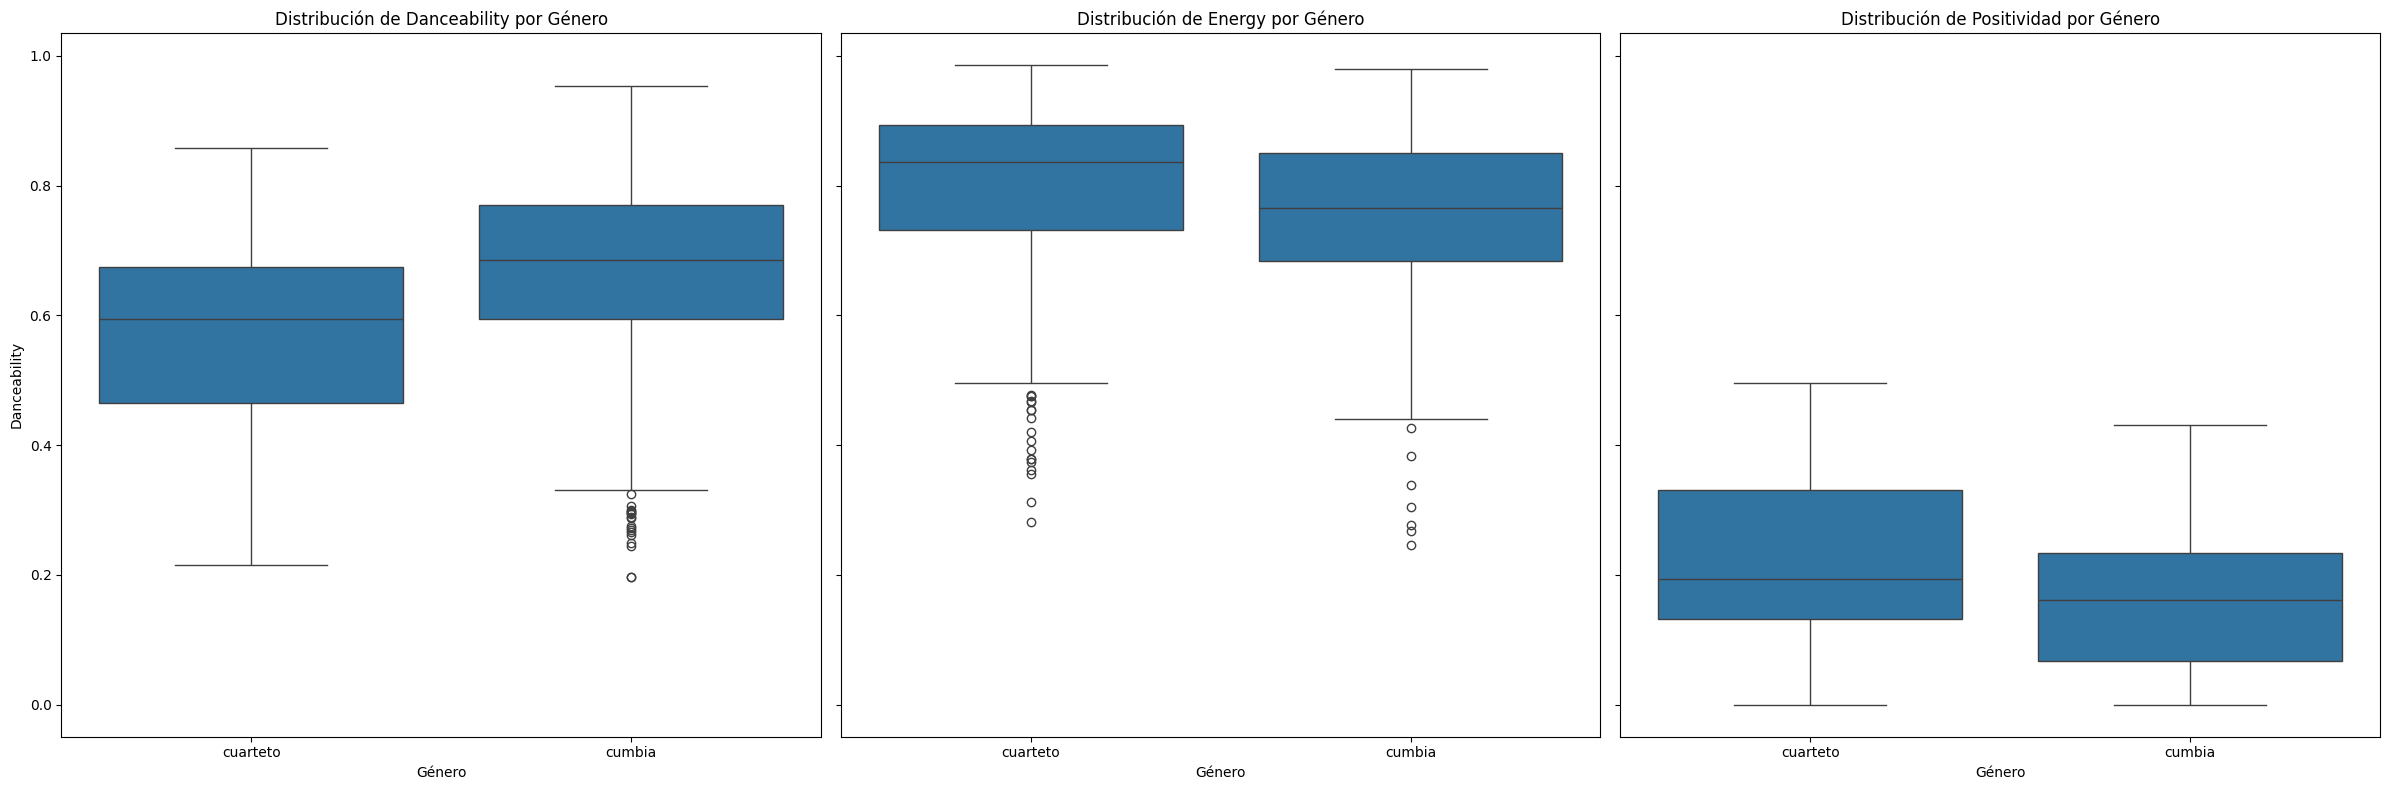

In [5]:
# Crear una figura y tres subplots horizontales
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharey=True)

# Mapeo de valores de género
genre_mapping = {0: 'cuarteto', 1: 'cumbia'}

# Distribución de Danceability por Género
sns.boxplot(ax=axes[0], x=df_spotify['genre'].map(genre_mapping), y='danceability', data=df_spotify)
axes[0].set_title('Distribución de Danceability por Género')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Danceability')
axes[0].tick_params(axis='x')

# Distribución de Energy por Género
sns.boxplot(ax=axes[1], x=df_spotify['genre'].map(genre_mapping), y='energy', data=df_spotify)
axes[1].set_title('Distribución de Energy por Género')
axes[1].set_xlabel('Género')
axes[1].tick_params(axis='x')

# Distribución de Positividad por Género
sns.boxplot(ax=axes[2], x=df_spotify['genre'].map(genre_mapping), y='positividad', data=df_spotify)
axes[2].set_title('Distribución de Positividad por Género')
axes[2].set_xlabel('Género')
axes[2].tick_params(axis='x')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

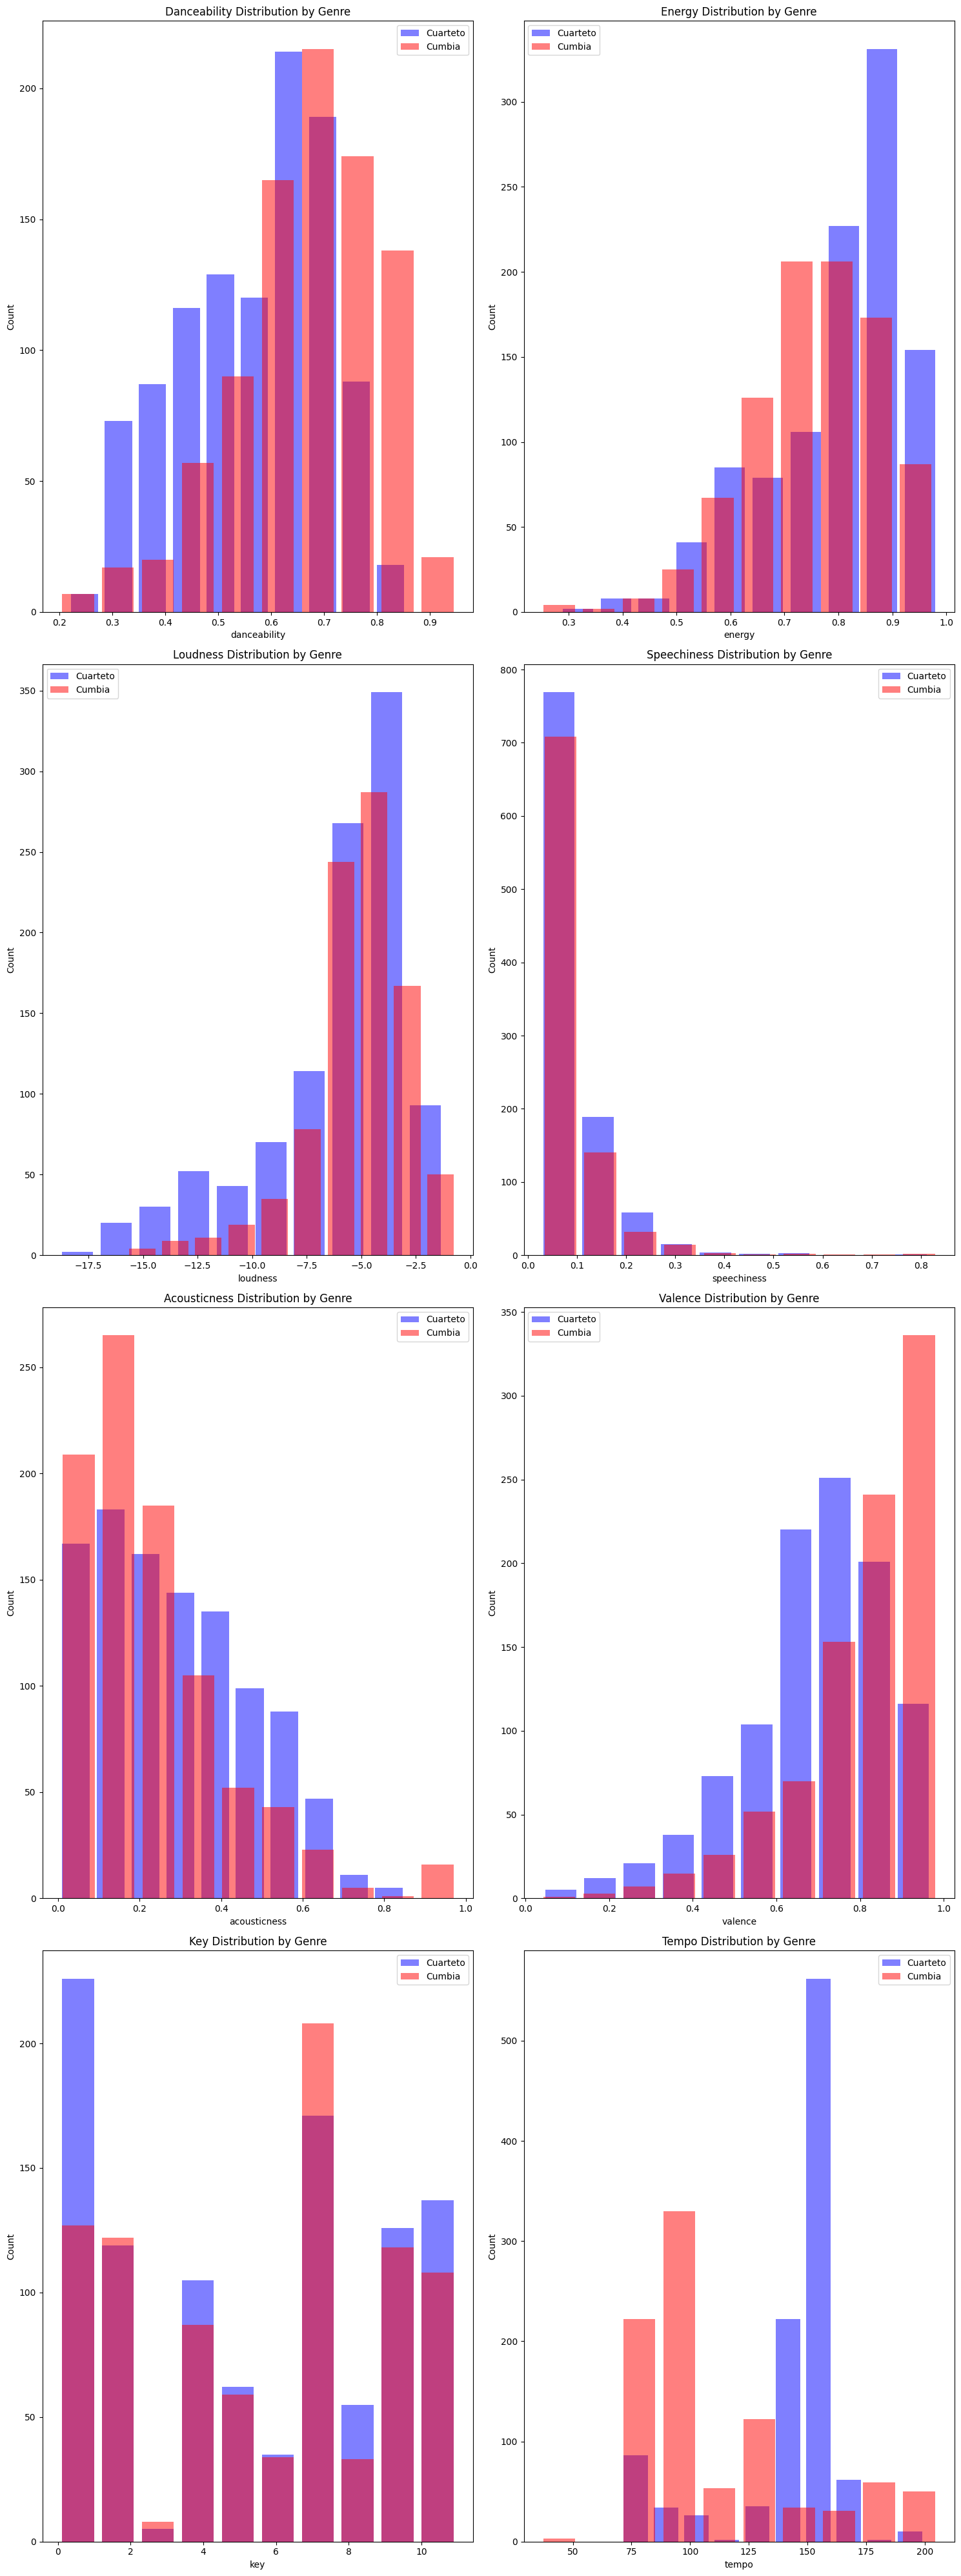

In [6]:
def plot_histogramas_por_feature(df, features, genre_colors=None):
    """
    Creates a set of histograms for various features of the songs in a DataFrame,
    filtering by each genre present in the DataFrame.

    Parameters:
        - df: Pandas DataFrame containing the songs data.
        - features: List of features (columns) for which the histograms will be created.
        - genre_colors: A dictionary that assigns colors to genres. If not provided,
          default colors will be used.

    Returns:
        - None
    """
    if genre_colors is None:
        genre_colors = {'0': 'blue', '1': 'red'}


    genres = {'0' : 'Cuarteto', '1' : 'Cumbia'}

    num_features = len(features)
    num_rows = (num_features + 1) // 2  
    fig, axes = plt.subplots(num_rows, 2, figsize=(15, 10*num_rows))  

    for idx, feature in enumerate(features):
        row_idx = idx // 2  
        col_idx = idx % 2   
        ax = axes[row_idx, col_idx] if num_rows > 1 else axes[col_idx] 

        # Iter by each genre into the DataFrame
        for genre in df['genre'].unique():
            # Filter by genre
            genre_data = df[df['genre'] == genre][feature]

            # Crearte the histogram of each genre
            ax.hist(genre_data, label=genres.get(str(genre),'¿?'), color=genre_colors.get(str(genre), 'gray'), alpha=0.5, rwidth=0.8)  # Ajustar rwidth para el ancho de las barras

        # Add labels, legend and title to subplot
        ax.legend()
        ax.set_xlabel(feature)
        ax.set_ylabel('Count')
        ax.set_title(f'{feature.capitalize()} Distribution by Genre')

    
    plt.tight_layout()
    plt.show()

features = ['danceability','energy','loudness','speechiness','acousticness', 'valence', 'key', 'tempo']  

plot_histogramas_por_feature(df_spotify, features)
